# Recordar instalar librería

In [ ]:
!pip install darts


# Cargar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NaiveDrift, NaiveSeasonal, ExponentialSmoothing
from darts.metrics import mape
from darts.datasets import AirPassengersDataset


# Cargar base de datos

<Axes: xlabel='Month'>

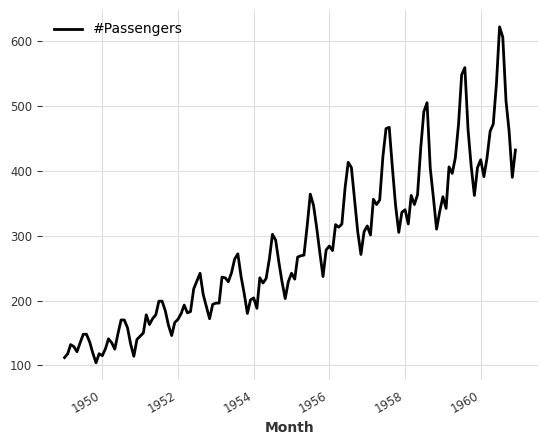

In [ ]:
series = AirPassengersDataset().load()
series.plot()


# Crear modelos

In [ ]:
naive_drift_model = NaiveDrift()
naive_seasonal_model = NaiveSeasonal()
exp_smooth_model = ExponentialSmoothing()

models = [naive_drift_model, naive_seasonal_model, exp_smooth_model]


# Entrenamiento y validación

In [ ]:
train, val = series.split_before(pd.Timestamp('1960-01-01'))
forecast_horizon = 12

for model in models:
    model.fit(train)
    forecast = model.predict(forecast_horizon)
    err = mape(val[:forecast_horizon], forecast)
    print(f"MAPE Error para {model}: {err}")




MAPE Error para NaiveDrift(): 12.417957002111173
MAPE Error para NaiveSeasonal(): 14.251338486772209
MAPE Error para ExponentialSmoothing(): 2.802823947659527


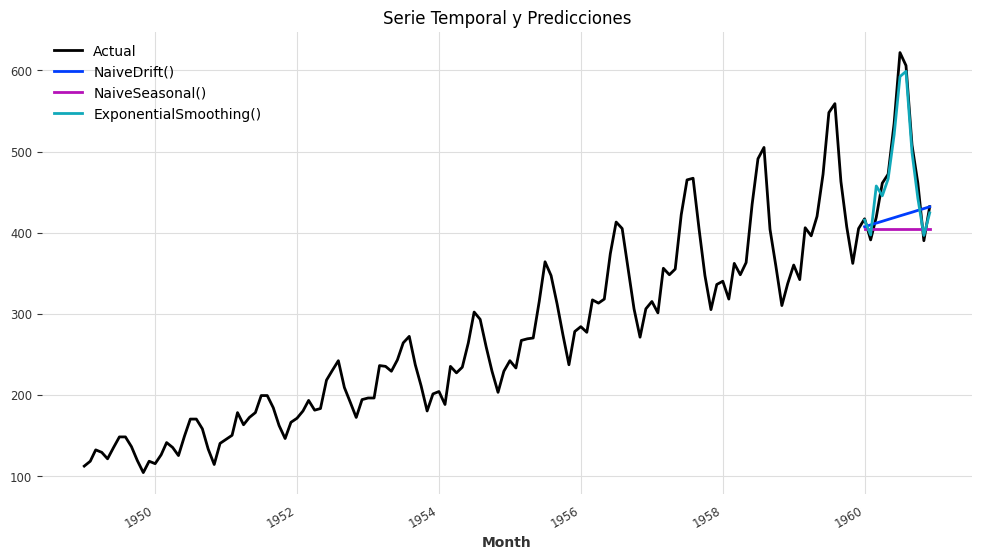

In [ ]:
plt.figure(figsize=(12, 6))
series.plot(label="Actual", lw=2)

for model in models:
    model.fit(train)
    forecast = model.predict(forecast_horizon)
    forecast.plot(label=str(model), lw=2)

plt.title("Serie Temporal y Predicciones")
plt.legend()
plt.grid(True)
plt.show()
